<a href="https://colab.research.google.com/github/rromerov/Proyecto_Integrador/blob/main/Avance2/Avance2.12.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Instituto Tecnológico y de Estudios Superiores de Monterrey
## Maestría en Inteligencia Artificial Aplicada
### Proyecto Integrador (Gpo 10) - TC5035.10

### **Proyecto: Aplicación de Modelos de Machine Learning y Acoplamiento Molecular en el Diseño Acelerado de Fármacos, propuesta contra la Viruela del Simio (MPOX). Enfoque en la Proteína F13; con Datos Experimentales Limitados.**

### Avance 1: Análisis exploratorio de datos

#### **Docentes:**
- Dra. Grettel Barceló Alonso - Profesor Titular
- Dr. Luis Eduardo Falcón Morales - Profesor Titular
- Dr. Carlos Alberto Brizuela Rodríguez  – Profesor Tutor

#### **Miembro del equipo:**
- Carlos Mario Larrahondo Valencia - A01794031



---


### Ingeniería de características
#### Contexto:

El desarrollo de características del proyecto de Diseño Acelerado de Fármacos, cuyo objetivo es identificar un modelo de inteligencia artificial capaz de a través de la identificación de compuestos moleculares que pueden ser eficaces en la inhibición de la proteína F13. La base de datos CHEMBL es la fuente de información que se ha analizado en este proyecto.

Una vez realizado el EDA en la activida # 01, la actividad que consiste en realizar el desarrollo de la ingenieria de caracteristicas, lo que se busca es determinar como se pueden mejorar los datos para que el modelo sea de mejor rendimiento; esto puede incluir descriptores moleculares, propiedades fisicoquímicas o interacciones entre características.

Es importante el desarrollo de caracteristicas para:

* Encontrar en la base de datos caracteristicas que sean mas adecuadas que las captadas inicialmente, esto puede ser comprendiendo nuevas caracteristicas o mejorar las definidas.

* Tener un incremento en la precision del modelo, evitar caracteristicas que afecte como sobre entrenamiento o subentrenamiento.

Es importante entender que este es un proceso iterativo en el cual se puede ir detectando a través dela experimentación de nuevos modelos la transformación de las caracteristicas y que permitira acercarse mas los compuestos moleculares con alta efectividad en la inhibición de la proteína F13.

Cargamos el CSV con la información recuperada de CHEMBL = 'CHEMBL613120' para el monkeypox virus o viruela del mono, a la cual pertenece la proteína F13.


In [1]:
# Instalación de rdkit
# Sin Output en consola
%%capture
! pip install rdkit

In [3]:
# Importar librerías
import pandas as pd
import numpy as np
from google.colab import drive
from rdkit import Chem
from rdkit.Chem import Descriptors, Lipinski, AllChem
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import os
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
# Cargar Google Drive al notebook
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [5]:
ruta_archivo_original_data = '/content/drive/My Drive/Colab Notebooks/data/bioactivity_data_clean.csv'

# Lee el archivo CSV en un DataFrame
df_all = pd.read_csv(ruta_archivo_original_data)

# Mostrar que se haya importado correctamente el archivo
df_all.head(5)

,action_type,activity_comment,activity_id,activity_properties,assay_chembl_id,assay_description,assay_type,assay_variant_accession,assay_variant_mutation,bao_endpoint,...,target_organism,target_pref_name,target_tax_id,text_value,toid,type,units,uo_units,upper_value,value
0,NaN,NaN,1499556,[],CHEMBL877318,In vitro inhibitory concentration of compound ...,B,NaN,NaN,BAO_0000190,...,Homo sapiens,Coagulation factor XIII,9606,NaN,NaN,IC50,uM,UO_0000065,NaN,11.00
1,NaN,NaN,1499557,[],CHEMBL877318,In vitro inhibitory concentration of compound ...,B,NaN,NaN,BAO_0000190,...,Homo sapiens,Coagulation factor XIII,9606,NaN,NaN,IC50,uM,UO_0000065,NaN,2.30
2,NaN,NaN,1499662,[],CHEMBL877318,In vitro inhibitory concentration of compound ...,B,NaN,NaN,BAO_0000190,...,Homo sapiens,Coagulation factor XIII,9606,NaN,NaN,IC50,uM,UO_0000065,NaN,0.70
3,NaN,NaN,1499663,[],CHEMBL877318,In vitro inhibitory concentration of compound ...,B,NaN,NaN,BAO_0000190,...,Homo sapiens,Coagulation factor XIII,9606,NaN,NaN,IC50,uM,UO_0000065,NaN,2.20
4,NaN,NaN,1499664,[],CHEMBL877318,In vitro inhibitory concentration of compound ...,B,NaN,NaN,BAO_0000190,...,Homo sapiens,Coagulation factor XIII,9606,NaN,NaN,IC50,uM,UO_0000065,NaN,0.13


In [6]:
df_all.action_type.unique()

array([nan,
       "{'action_type': 'INHIBITOR', 'description': 'Negatively effects (inhibits) the normal functioning of the protein e.g., prevention of enzymatic reaction or activation of downstream pathway', 'parent_type': 'NEGATIVE MODULATOR'}"],
      dtype=object)

In [7]:
# Observamos los tipos de dato para cada columna del DF - Ya definidos su correspondiente concepto
df_all.dtypes

,0
action_type,object
activity_comment,object
activity_id,int64
activity_properties,object
assay_chembl_id,object
assay_description,object
assay_type,object
assay_variant_accession,float64
assay_variant_mutation,float64
bao_endpoint,object


El modelo de aprendizaje contempla las variables que son de tipo numericas.

**Umbral de Varianza:**

In [8]:
# Lista de columnas numéricas
col_num = ['pchembl_value', 'potential_duplicate', 'standard_flag', 'standard_value', 'value', 'document_year']

# Calcular la varianza de cada columna
varianzas = df_all[col_num].var()

# Definir el umbral de varianza
umbral_varianza = 0.1

# Filtrar las columnas con varianza menor al umbral
columnas_a_eliminar = varianzas[varianzas < umbral_varianza].index.tolist()

# Imprimir las varianzas de cada columna
for columna, varianza in varianzas.items():
    print(f"Varianza de '{columna}': {varianza}")

Varianza de 'pchembl_value': 1.1197523612832163
Varianza de 'potential_duplicate': 0.0029850746268656725
Varianza de 'standard_flag': 0.04016444722495309
Varianza de 'standard_value': 3228760312.5621367
Varianza de 'value': 62457886.97323384
Varianza de 'document_year': 22.16072928769327


In [9]:
# Imprimir las columnas a eliminar
print("Columnas a eliminar por baja varianza:")
print(columnas_a_eliminar)

Columnas a eliminar por baja varianza:
['potential_duplicate', 'standard_flag']


**Correlación:**

Matriz de Correlación:
                pchembl_value  standard_value     value  document_year
pchembl_value        1.000000       -0.694265 -0.137294      -0.288351
standard_value      -0.694265        1.000000  0.085162       0.108361
value               -0.137294        0.085162  1.000000      -0.012357
document_year       -0.288351        0.108361 -0.012357       1.000000


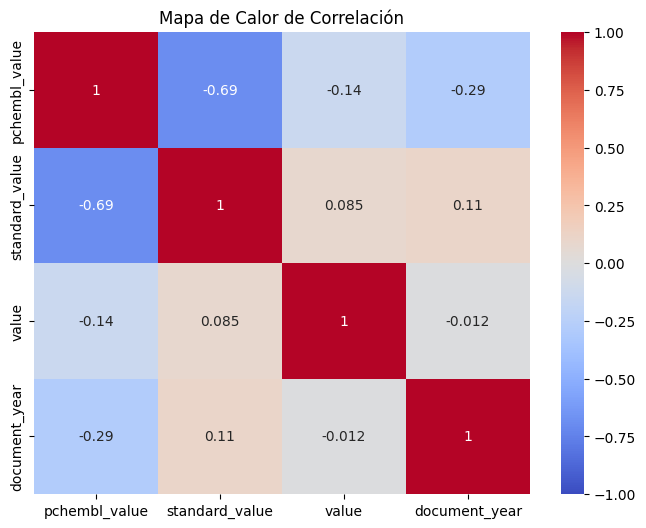

In [11]:
# Lista de columnas numéricas
col_num = ['pchembl_value', 'standard_value', 'value', 'document_year']

# Calcular la matriz de correlación
correlation_matrix = df_all[col_num].corr(numeric_only=True, method='pearson')

# Mostrar la matriz de correlación
print("Matriz de Correlación:")
print(correlation_matrix)

# Crear un mapa de calor (heatmap) de la matriz de correlación
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Mapa de Calor de Correlación')
plt.show()

**Conclusión.**

Segun la matriz de correlación, se encuentra que el standard value tiene el mejor valor y despues sigue la variable pchembl_value. Con esto se inicia con el standard value el analisis.



---


### Operaciones sobre características
#### Generación, Escalamiento y Transformación de columnas

Las columnas (molecule_chembl_id,canonical_smiles,standard_value) y bioactivity_class se combinarán en un solo DataFrame. Recordemos las definiciones ya presentadas de los campos:

* **molecule_chembl_id**: Codigo unico asignado para identificar una molecula.

* **canonical_smiles**: El SMILES canónico es una representación estandarizada de la estructura química de una molécula.

* **standard_value**: Esta columna contiene valores numéricos para analizar la actividad biológica de las moléculas o realizar comparaciones cuantitativas entre ellas.



In [12]:
ruta_archivo = '/content/drive/My Drive/Colab Notebooks/data/bioactivity_data_preprocessed.csv'

# Lee el archivo CSV en un DataFrame
df = pd.read_csv(ruta_archivo)

# Mostrar que se haya importado correctamente el archivo
df.head(10)

,molecule_chembl_id,canonical_smiles,standard_value
0,CHEMBL192660,NCCCCCCNc1nsc2nccn12,11000.0
1,CHEMBL190568,O=S(=O)(NCCCCCCNc1nsc2nccn12)c1ccccc1,2300.0
2,CHEMBL365470,Cc1ccccc1S(=O)(=O)NCCCCCCNc1nsc2nccn12,700.0
3,CHEMBL189379,Cc1ccc(S(=O)(=O)NCCCCCCNc2nsc3nccn23)cc1,2200.0
4,CHEMBL193212,O=[N+]([O-])c1ccccc1S(=O)(=O)NCCCCCCNc1nsc2nccn12,130.0
5,CHEMBL192770,O=[N+]([O-])c1cccc(S(=O)(=O)NCCCCCCNc2nsc3nccn...,1900.0
6,CHEMBL193724,O=[N+]([O-])c1ccc(S(=O)(=O)NCCCCCCNc2nsc3nccn2...,910.0
7,CHEMBL192376,CCCCCCNS(=O)(=O)c1ccccc1[N+](=O)[O-],100000.0
8,CHEMBL191254,O=[N+]([O-])c1ccccc1S(=O)(=O)NCCCCCCNc1ncccc1[...,170000.0
9,CHEMBL193220,CC(=O)CSc1n[n+]2c(C)csc2s1.[O-][Cl+3]([O-])([O...,100.0


In [13]:
selection = ['molecule_chembl_id','canonical_smiles','standard_value']
df2 = df[selection]

df2.head(10)

,molecule_chembl_id,canonical_smiles,standard_value
0,CHEMBL192660,NCCCCCCNc1nsc2nccn12,11000.0
1,CHEMBL190568,O=S(=O)(NCCCCCCNc1nsc2nccn12)c1ccccc1,2300.0
2,CHEMBL365470,Cc1ccccc1S(=O)(=O)NCCCCCCNc1nsc2nccn12,700.0
3,CHEMBL189379,Cc1ccc(S(=O)(=O)NCCCCCCNc2nsc3nccn23)cc1,2200.0
4,CHEMBL193212,O=[N+]([O-])c1ccccc1S(=O)(=O)NCCCCCCNc1nsc2nccn12,130.0
5,CHEMBL192770,O=[N+]([O-])c1cccc(S(=O)(=O)NCCCCCCNc2nsc3nccn...,1900.0
6,CHEMBL193724,O=[N+]([O-])c1ccc(S(=O)(=O)NCCCCCCNc2nsc3nccn2...,910.0
7,CHEMBL192376,CCCCCCNS(=O)(=O)c1ccccc1[N+](=O)[O-],100000.0
8,CHEMBL191254,O=[N+]([O-])c1ccccc1S(=O)(=O)NCCCCCCNc1ncccc1[...,170000.0
9,CHEMBL193220,CC(=O)CSc1n[n+]2c(C)csc2s1.[O-][Cl+3]([O-])([O...,100.0


#### Etiquetado de componentes
Una de las caracteristicas importantes se encuentra al describir la bioactividad de la molecula segun su rango de valor: Activa, inactiva e intermedia.

In [14]:
bioactivity_threshold = []
for i in df2.standard_value:
  if float(i) >= 10000:
    bioactivity_threshold.append("inactive")
  elif float(i) <= 1000:
    bioactivity_threshold.append("active")
  else:
    bioactivity_threshold.append("intermediate")

In [15]:
# Concatenar lista generada como una serie de pandas y agregarla al df
bioactivity_class = pd.Series(bioactivity_threshold, name='class')
df3 = pd.concat([df2, bioactivity_class], axis=1)


df3.head(10)

,molecule_chembl_id,canonical_smiles,standard_value,class
0,CHEMBL192660,NCCCCCCNc1nsc2nccn12,11000.0,inactive
1,CHEMBL190568,O=S(=O)(NCCCCCCNc1nsc2nccn12)c1ccccc1,2300.0,intermediate
2,CHEMBL365470,Cc1ccccc1S(=O)(=O)NCCCCCCNc1nsc2nccn12,700.0,active
3,CHEMBL189379,Cc1ccc(S(=O)(=O)NCCCCCCNc2nsc3nccn23)cc1,2200.0,intermediate
4,CHEMBL193212,O=[N+]([O-])c1ccccc1S(=O)(=O)NCCCCCCNc1nsc2nccn12,130.0,active
5,CHEMBL192770,O=[N+]([O-])c1cccc(S(=O)(=O)NCCCCCCNc2nsc3nccn...,1900.0,intermediate
6,CHEMBL193724,O=[N+]([O-])c1ccc(S(=O)(=O)NCCCCCCNc2nsc3nccn2...,910.0,active
7,CHEMBL192376,CCCCCCNS(=O)(=O)c1ccccc1[N+](=O)[O-],100000.0,inactive
8,CHEMBL191254,O=[N+]([O-])c1ccccc1S(=O)(=O)NCCCCCCNc1ncccc1[...,170000.0,inactive
9,CHEMBL193220,CC(=O)CSc1n[n+]2c(C)csc2s1.[O-][Cl+3]([O-])([O...,100.0,active


#### Calcular descriptores Lipinski

##### Regla de Lipinski



In [16]:
def lipinski(smiles, verbose=False):

    # Crear una lista para almacenar las moléculas convertidas desde SMILES
    moldata = []
    for element in smiles:
        mol = Chem.MolFromSmiles(element)
        moldata.append(mol)

    # Inicializar un array de datos base para los descriptores
    baseData = np.arange(1, 1)
    i = 0
    for mol in moldata:
        # Calcular los descriptores de Lipinski para cada molécula
        desc_MolWt = Descriptors.MolWt(mol)
        desc_MolLogP = Descriptors.MolLogP(mol)
        desc_NumHDonors = Lipinski.NumHDonors(mol)
        desc_NumAcceptors = Lipinski.NumHAcceptors(mol)

        # Almacenar los descriptores en un array de fila
        row = np.array([desc_MolWt,
                        desc_MolLogP,
                        desc_NumHDonors,
                        desc_NumAcceptors])

        # Agregar la fila al array baseData
        if i == 0:
            baseData = row
        else:
            baseData = np.vstack([baseData, row])
        i = i + 1

    # Crear un DataFrame con nombres de columna
    columnNames = ['MW', 'LogP', 'NumHDonors', 'NumHAcceptors']
    descriptors = pd.DataFrame(data=baseData, columns=columnNames)

    return descriptors

In [17]:
# Llamado de la funcion lipsinki
df_lipinski = lipinski(df3.canonical_smiles)

#### Combinar DataFrames

In [18]:
# Visualizar el dataframe con los descriptores calculados
df_lipinski

,MW,LogP,NumHDonors,NumHAcceptors
0,239.348,1.72180,2.0,6.0
1,379.511,2.74160,2.0,7.0
2,393.538,3.05002,2.0,7.0
3,393.538,3.05002,2.0,7.0
4,424.508,2.64980,2.0,9.0
...,...,...,...,...
266,366.427,4.54470,2.0,2.0
267,366.427,4.68880,2.0,2.0
268,337.385,4.79410,1.0,1.0
269,376.334,2.40330,1.0,3.0


In [19]:
combined_df = pd.concat([df3, df_lipinski], axis=1)
combined_df.head(10)

,molecule_chembl_id,canonical_smiles,standard_value,class,MW,LogP,NumHDonors,NumHAcceptors
0,CHEMBL192660,NCCCCCCNc1nsc2nccn12,11000.0,inactive,239.348,1.72180,2.0,6.0
1,CHEMBL190568,O=S(=O)(NCCCCCCNc1nsc2nccn12)c1ccccc1,2300.0,intermediate,379.511,2.74160,2.0,7.0
2,CHEMBL365470,Cc1ccccc1S(=O)(=O)NCCCCCCNc1nsc2nccn12,700.0,active,393.538,3.05002,2.0,7.0
3,CHEMBL189379,Cc1ccc(S(=O)(=O)NCCCCCCNc2nsc3nccn23)cc1,2200.0,intermediate,393.538,3.05002,2.0,7.0
4,CHEMBL193212,O=[N+]([O-])c1ccccc1S(=O)(=O)NCCCCCCNc1nsc2nccn12,130.0,active,424.508,2.64980,2.0,9.0
5,CHEMBL192770,O=[N+]([O-])c1cccc(S(=O)(=O)NCCCCCCNc2nsc3nccn...,1900.0,intermediate,424.508,2.64980,2.0,9.0
6,CHEMBL193724,O=[N+]([O-])c1ccc(S(=O)(=O)NCCCCCCNc2nsc3nccn2...,910.0,active,424.508,2.64980,2.0,9.0
7,CHEMBL192376,CCCCCCNS(=O)(=O)c1ccccc1[N+](=O)[O-],100000.0,inactive,286.353,2.45340,1.0,4.0
8,CHEMBL191254,O=[N+]([O-])c1ccccc1S(=O)(=O)NCCCCCCNc1ncccc1[...,170000.0,inactive,423.451,2.84880,2.0,8.0
9,CHEMBL193220,CC(=O)CSc1n[n+]2c(C)csc2s1.[O-][Cl+3]([O-])([O...,100.0,active,344.823,-2.82318,0.0,9.0


#### Convertir IC50 a pIC50



In [20]:
def pIC50(input):
  pIC50 = []
  for i in input['standard_value_norm']:
    molar = i*(10**-9) # Convierte nM a M
    pIC50.append(-np.log10(molar))

  input['pIC50'] = pIC50
  x = input.drop(columns='standard_value_norm')
  return x

In [21]:
combined_df.standard_value.describe()

,standard_value
count,271.000000
mean,30372.520886
std,60754.863505
min,1.300000
25%,325.000000
50%,1600.000000
75%,35600.000000
max,500000.000000


In [22]:
def norm_value(input):
    # lista para guardar valores normalizados
    norm = []

    for i in input['standard_value']:
        # valores mayores a 100000000 se quedan en 100000000
        if i > 100000000:
          i = 100000000
        # agregarlos a la lista
        norm.append(i)

    # nueva columna con valores estándar normalizados
    input['standard_value_norm'] = norm
    # eliminar columna con los datos sin normalizar
    x = input.drop(columns='standard_value')

    return x

# Normalización valores de la columna standard_value.

In [23]:
df_norm = norm_value(combined_df)
df_norm.head(5)

,molecule_chembl_id,canonical_smiles,class,MW,LogP,NumHDonors,NumHAcceptors,standard_value_norm
0,CHEMBL192660,NCCCCCCNc1nsc2nccn12,inactive,239.348,1.72180,2.0,6.0,11000.0
1,CHEMBL190568,O=S(=O)(NCCCCCCNc1nsc2nccn12)c1ccccc1,intermediate,379.511,2.74160,2.0,7.0,2300.0
2,CHEMBL365470,Cc1ccccc1S(=O)(=O)NCCCCCCNc1nsc2nccn12,active,393.538,3.05002,2.0,7.0,700.0
3,CHEMBL189379,Cc1ccc(S(=O)(=O)NCCCCCCNc2nsc3nccn23)cc1,intermediate,393.538,3.05002,2.0,7.0,2200.0
4,CHEMBL193212,O=[N+]([O-])c1ccccc1S(=O)(=O)NCCCCCCNc1nsc2nccn12,active,424.508,2.64980,2.0,9.0,130.0


In [24]:
df_plc50 = pIC50(df_norm)
df_plc50.head(10)

,molecule_chembl_id,canonical_smiles,class,MW,LogP,NumHDonors,NumHAcceptors,pIC50
0,CHEMBL192660,NCCCCCCNc1nsc2nccn12,inactive,239.348,1.72180,2.0,6.0,4.958607
1,CHEMBL190568,O=S(=O)(NCCCCCCNc1nsc2nccn12)c1ccccc1,intermediate,379.511,2.74160,2.0,7.0,5.638272
2,CHEMBL365470,Cc1ccccc1S(=O)(=O)NCCCCCCNc1nsc2nccn12,active,393.538,3.05002,2.0,7.0,6.154902
3,CHEMBL189379,Cc1ccc(S(=O)(=O)NCCCCCCNc2nsc3nccn23)cc1,intermediate,393.538,3.05002,2.0,7.0,5.657577
4,CHEMBL193212,O=[N+]([O-])c1ccccc1S(=O)(=O)NCCCCCCNc1nsc2nccn12,active,424.508,2.64980,2.0,9.0,6.886057
5,CHEMBL192770,O=[N+]([O-])c1cccc(S(=O)(=O)NCCCCCCNc2nsc3nccn...,intermediate,424.508,2.64980,2.0,9.0,5.721246
6,CHEMBL193724,O=[N+]([O-])c1ccc(S(=O)(=O)NCCCCCCNc2nsc3nccn2...,active,424.508,2.64980,2.0,9.0,6.040959
7,CHEMBL192376,CCCCCCNS(=O)(=O)c1ccccc1[N+](=O)[O-],inactive,286.353,2.45340,1.0,4.0,4.000000
8,CHEMBL191254,O=[N+]([O-])c1ccccc1S(=O)(=O)NCCCCCCNc1ncccc1[...,inactive,423.451,2.84880,2.0,8.0,3.769551
9,CHEMBL193220,CC(=O)CSc1n[n+]2c(C)csc2s1.[O-][Cl+3]([O-])([O...,active,344.823,-2.82318,0.0,9.0,7.000000


In [25]:
df_plc50.pIC50.describe()

,pIC50
count,271.000000
mean,5.646899
std,1.221276
min,3.301030
25%,4.448612
50%,5.795880
75%,6.488168
max,8.886057


In [26]:
# Reemplazar "active" por 1, "intermediate" por 0.5 y "inactive" por 0
df_plc50.loc[:, 'class'] = df_plc50['class'].replace({'active': 1, 'intermediate': 0.5, 'inactive': 0})
df_plc50

<ipython-input-26-72fb6f04e6b7>:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_plc50.loc[:, 'class'] = df_plc50['class'].replace({'active': 1, 'intermediate': 0.5, 'inactive': 0})


,molecule_chembl_id,canonical_smiles,class,MW,LogP,NumHDonors,NumHAcceptors,pIC50
0,CHEMBL192660,NCCCCCCNc1nsc2nccn12,0.0,239.348,1.72180,2.0,6.0,4.958607
1,CHEMBL190568,O=S(=O)(NCCCCCCNc1nsc2nccn12)c1ccccc1,0.5,379.511,2.74160,2.0,7.0,5.638272
2,CHEMBL365470,Cc1ccccc1S(=O)(=O)NCCCCCCNc1nsc2nccn12,1.0,393.538,3.05002,2.0,7.0,6.154902
3,CHEMBL189379,Cc1ccc(S(=O)(=O)NCCCCCCNc2nsc3nccn23)cc1,0.5,393.538,3.05002,2.0,7.0,5.657577
4,CHEMBL193212,O=[N+]([O-])c1ccccc1S(=O)(=O)NCCCCCCNc1nsc2nccn12,1.0,424.508,2.64980,2.0,9.0,6.886057
...,...,...,...,...,...,...,...,...
266,CHEMBL4878636,CC(NNC(=O)c1ccc(C(F)(F)F)cc1)C12CC3CC(CC(C3)C1)C2,1.0,366.427,4.54470,2.0,2.0,6.288193
267,CHEMBL4872088,CCC12CC3CC(C1)CC(NNC(=O)c1ccc(C(F)(F)F)cc1)(C3)C2,0.5,366.427,4.68880,2.0,2.0,5.779892
268,CHEMBL4856490,CC12CC3CC(C1)CC(NC(=O)c1ccc(C(F)(F)F)cc1)(C3)C2,0.5,337.385,4.79410,1.0,1.0,5.046724
269,CHEMBL1257073,O=C(NN1C(=O)[C@@H]2[C@@H]3C=C[C@@H]([C@H]4C[C@...,1.0,376.334,2.40330,1.0,3.0,8.575118


Se realiza operación para la eliminacion de los outliers y luego proceso de estandarización de las columnas

In [27]:
# Eliminar outliers usando el IQR
def remove_outliers(df,column):
  Q1 = df[column].quantile(0.25)
  Q3 = df[column].quantile(0.75)
  IQR = Q3 - Q1
  lower_bound = Q1 - 1.5 * IQR
  upper_bound = Q3 + 1.5 * IQR
  return df[(df[column] >= lower_bound) & (df [column] <= upper_bound) ]

# Eliminar outliers en las columnas 'MW' y 'LogP'
df_plc50 = remove_outliers(df_plc50, 'MW')
df_plc50 = remove_outliers(df_plc50, 'LogP')

In [28]:
# Verificar el rango del valor

valores_maximos = df_plc50.max()
valores_minimos = df_plc50.min()
# Imprimir los valores máximo y mínimo de cada columna
for columna in df_plc50.columns:
    if pd.api.types.is_numeric_dtype(df_plc50[columna]):  # Verificar si la columna es numérica
        print(f"Columna '{columna}':")
        print("  Valor máximo:", valores_maximos[columna])
        print("  Valor mínimo:", valores_minimos[columna])

Columna 'MW':
  Valor máximo: 1064.2479999999996
  Valor mínimo: 145.25
Columna 'LogP':
  Valor máximo: 5.442920000000005
  Valor mínimo: -0.7193599999999944
Columna 'NumHDonors':
  Valor máximo: 9.0
  Valor mínimo: 0.0
Columna 'NumHAcceptors':
  Valor máximo: 12.0
  Valor mínimo: 1.0
Columna 'pIC50':
  Valor máximo: 8.886056647693163
  Valor mínimo: 3.5228787452803374


In [29]:
df_standar = df_plc50.copy()

In [30]:
# Seleccionar las columnas que deseas estandarizar
columnas_numericas = ['MW', 'LogP', 'NumHDonors', 'NumHAcceptors']
columna_minmax = ['pIC50']

# Crear objetos StandardScaler y MinMaxScaler
scaler_standard = StandardScaler()
scaler_minmax = MinMaxScaler()

# Aplicar la estandarización a las columnas seleccionadas
df_standar[columnas_numericas] = scaler_standard.fit_transform(df_standar[columnas_numericas])

# Aplicar MinMaxScaler a la columna pIC50
df_standar[columna_minmax] = scaler_minmax.fit_transform(df_standar[columna_minmax])

In [31]:
# Verificar el rango del valor
valores_maximos = df_standar.max()
valores_minimos = df_standar.min()

# Imprimir los valores máximo y mínimo de cada columna
for columna in df_standar.columns:
    if pd.api.types.is_numeric_dtype(df_standar[columna]):  # Verificar si la columna es numérica
        print(f"Columna '{columna}':")
        print("  Valor máximo:", valores_maximos[columna])
        print("  Valor mínimo:", valores_minimos[columna])

Columna 'MW':
  Valor máximo: 4.7423919005612545
  Valor mínimo: -1.982707417006227
Columna 'LogP':
  Valor máximo: 2.2837953668892057
  Valor mínimo: -2.520190427398452
Columna 'NumHDonors':
  Valor máximo: 5.609386014507686
  Valor mínimo: -1.5832944395787825
Columna 'NumHAcceptors':
  Valor máximo: 3.167667949127275
  Valor mínimo: -1.916297403498193
Columna 'pIC50':
  Valor máximo: 1.0
  Valor mínimo: 0.0


In [32]:
# Guardar datos escalados
df_standar.to_csv('/content/drive/My Drive/Colab Notebooks/data/scaled_minmax_data.csv', index=False)
df_standar

,molecule_chembl_id,canonical_smiles,class,MW,LogP,NumHDonors,NumHAcceptors,pIC50
0,CHEMBL192660,NCCCCCCNc1nsc2nccn12,0.0,-1.294111,-0.617113,0.015079,0.394596,0.267701
1,CHEMBL190568,O=S(=O)(NCCCCCCNc1nsc2nccn12)c1ccccc1,0.5,-0.268418,0.177902,0.015079,0.856775,0.394429
2,CHEMBL365470,Cc1ccccc1S(=O)(=O)NCCCCCCNc1nsc2nccn12,1.0,-0.165770,0.418340,0.015079,0.856775,0.490758
3,CHEMBL189379,Cc1ccc(S(=O)(=O)NCCCCCCNc2nsc3nccn23)cc1,0.5,-0.165770,0.418340,0.015079,0.856775,0.398029
4,CHEMBL193212,O=[N+]([O-])c1ccccc1S(=O)(=O)NCCCCCCNc1nsc2nccn12,1.0,0.060864,0.106337,0.015079,1.781132,0.627087
...,...,...,...,...,...,...,...,...
266,CHEMBL4878636,CC(NNC(=O)c1ccc(C(F)(F)F)cc1)C12CC3CC(CC(C3)C1)C2,1.0,-0.364165,1.583562,0.015079,-1.454119,0.515611
267,CHEMBL4872088,CCC12CC3CC(C1)CC(NNC(=O)c1ccc(C(F)(F)F)cc1)(C3)C2,0.5,-0.364165,1.695899,0.015079,-1.454119,0.420835
268,CHEMBL4856490,CC12CC3CC(C1)CC(NC(=O)c1ccc(C(F)(F)F)cc1)(C3)C2,0.5,-0.576690,1.777989,-0.784108,-1.916297,0.284131
269,CHEMBL1257073,O=C(NN1C(=O)[C@@H]2[C@@H]3C=C[C@@H]([C@H]4C[C@...,1.0,-0.291667,-0.085829,-0.784108,-0.991940,0.942023


In [33]:
df_canonical_rep = df_standar.copy()

In [34]:
selection = ['canonical_smiles','molecule_chembl_id']
df_selection = df_plc50[selection]
df_selection.to_csv('/content/drive/My Drive/Colab Notebooks/data/molecule.smi', sep='\t', index=False, header=False)
df_selection.to_csv('molecule.smi', sep='\t', index=False, header=False)

In [35]:
! cat '/content/drive/My Drive/Colab Notebooks/data/molecule.smi' | head -5

NCCCCCCNc1nsc2nccn12	CHEMBL192660
O=S(=O)(NCCCCCCNc1nsc2nccn12)c1ccccc1	CHEMBL190568
Cc1ccccc1S(=O)(=O)NCCCCCCNc1nsc2nccn12	CHEMBL365470
Cc1ccc(S(=O)(=O)NCCCCCCNc2nsc3nccn23)cc1	CHEMBL189379
O=[N+]([O-])c1ccccc1S(=O)(=O)NCCCCCCNc1nsc2nccn12	CHEMBL193212


In [36]:
! cat '/content/drive/My Drive/Colab Notebooks/data/molecule.smi' | wc -l

212


#### Transformacion de los datos - Uso de Software PaDel (Descriptor)

A traves del uso del software PaDel se realiza una transformación de la información molecular en una generación de informacion de ceros y unos, los cuales empiezan a caracterizar las moleculas, segun su bioactividad. Este analisis permite identificar comportamientos similares o propiedades similares de la bioactivdad que puede tener un conjunto de moleculas, por lo que pueden compartir información que permita hallar compuestos para el desarrollo del compuesto que se esta buscando.


In [37]:
# Función para estimar los descriptores de huellas dactilares
def calculate_pubchem_fingerprints(smiles):
    mol = Chem.MolFromSmiles(smiles)
    if mol is None:
        return None
    fp = AllChem.GetMorganFingerprintAsBitVect(mol, 2, nBits=2048)  # Morgan fingerprint, radius=2, nBits=2048
    return fp

# Leer el archivo molecule.smi y calcular los descriptores de huellas dactilares
data = pd.read_csv("/content/drive/My Drive/Colab Notebooks/data/molecule.smi", sep="\t", header=None, names=["SMILES", "ID"])

# Eliminar las sales y normalizar los nitros utilizando RDKit
data["SMILES"] = data["SMILES"].apply(Chem.MolFromSmiles)
data["SMILES"] = data["SMILES"].apply(Chem.RemoveHs)
data["SMILES"] = data["SMILES"].apply(Chem.MolToSmiles)

fingerprints = []
for smiles in data["SMILES"]:
    fp = calculate_pubchem_fingerprints(smiles)
    if fp is not None:
        # Convertir el objeto ExplicitBitVect a una lista de enteros
        arr = [int(x) for x in fp.ToBitString()]
        fingerprints.append(arr)

# Convertir los descriptores de huellas dactilares en un DataFrame de pandas
fingerprints_df = pd.DataFrame(fingerprints)
fingerprints_df.columns = [f"PubchemFP{i}" for i in range(len(fingerprints_df.columns))]
fingerprints_df.insert(0, "Name", data["ID"])

# Guardar los descriptores de huellas dactilares en un archivo CSV
fingerprints_df.to_csv('/content/drive/My Drive/Colab Notebooks/data/descriptors_output.csv', index=False)

[20:34:41] DEPRECATION WARNING: please use MorganGenerator
[20:34:41] DEPRECATION WARNING: please use MorganGenerator
[20:34:41] DEPRECATION WARNING: please use MorganGenerator
[20:34:41] DEPRECATION WARNING: please use MorganGenerator
[20:34:41] DEPRECATION WARNING: please use MorganGenerator
[20:34:41] DEPRECATION WARNING: please use MorganGenerator
[20:34:41] DEPRECATION WARNING: please use MorganGenerator
[20:34:41] DEPRECATION WARNING: please use MorganGenerator
[20:34:41] DEPRECATION WARNING: please use MorganGenerator
[20:34:41] DEPRECATION WARNING: please use MorganGenerator
[20:34:41] DEPRECATION WARNING: please use MorganGenerator
[20:34:41] DEPRECATION WARNING: please use MorganGenerator
[20:34:41] DEPRECATION WARNING: please use MorganGenerator
[20:34:41] DEPRECATION WARNING: please use MorganGenerator
[20:34:41] DEPRECATION WARNING: please use MorganGenerator
[20:34:41] DEPRECATION WARNING: please use MorganGenerator
[20:34:41] DEPRECATION WARNING: please use MorganGenerat

In [38]:
fingerprints_df

,Name,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,PubchemFP6,PubchemFP7,PubchemFP8,...,PubchemFP2038,PubchemFP2039,PubchemFP2040,PubchemFP2041,PubchemFP2042,PubchemFP2043,PubchemFP2044,PubchemFP2045,PubchemFP2046,PubchemFP2047
0,CHEMBL192660,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,CHEMBL190568,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,CHEMBL365470,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,CHEMBL189379,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,CHEMBL193212,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
207,CHEMBL4878636,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
208,CHEMBL4872088,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
209,CHEMBL4856490,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
210,CHEMBL1257073,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


En este notebook, se ha optado por utilizar PaDEL-Descriptor para la generación de descriptores moleculares, en lugar de implementar algoritmos propios en Python. Esta decisión se basa en las siguientes razones:

1. **Amplitud y Validación de Descriptores**: PaDEL-Descriptor ofrece una colección extensa de más de 1875 descriptores, cubriendo una amplia gama de propiedades moleculares relevantes para estudios de bioactividad, incluyendo descriptores 1D, 2D y fingerprints. Estos descriptores han sido ampliamente validados y utilizados en la literatura científica, asegurando la solidez y confiabilidad de nuestro análisis.
2. **Eficiencia y Rendimiento**: PaDEL-Descriptor está implementado en Java, un lenguaje conocido por su eficiencia en el manejo de grandes conjuntos de datos. Además, PaDEL está optimizado para el cálculo paralelo de descriptores, lo que acelera significativamente el proceso de generación de datos. Implementar una cantidad similar de algoritmos en Python, aunque posible, resultaría en un mayor tiempo de desarrollo y ejecución, impactando negativamente la eficiencia del proyecto.
3. **Facilidad de Uso e Integración**: PaDEL-Descriptor proporciona una interfaz de línea de comandos sencilla e intuitiva, permitiendo una fácil integración con scripts de Python. La opción de utilizar archivos XML para configurar la generación de descriptores ofrece un alto grado de flexibilidad y control sobre el proceso. Desarrollar un sistema equivalente en Python requeriría un esfuerzo significativo en la creación de interfaces y gestión de dependencias.
4. **Soporte y Comunidad**: PaDEL-Descriptor es una herramienta de código abierto con una comunidad activa de usuarios y desarrolladores. Esto garantiza un soporte continuo, actualizaciones regulares y la posibilidad de resolver dudas o problemas que puedan surgir durante el desarrollo del proyecto.
5. **Replicabilidad e Interoperabilidad**: El uso de una herramienta establecida como PaDEL-Descriptor facilita la reproducibilidad de nuestro estudio. Otros investigadores podrán replicar nuestro análisis utilizando la misma herramienta y configuración, contribuyendo a la validación de nuestros resultados. Además, la salida de PaDEL se integra fácilmente con otras herramientas de análisis de datos y aprendizaje automático, favoreciendo la interoperabilidad y el flujo de trabajo.

La elección de PaDEL-Descriptor se justifica por su amplitud de descriptores, eficiencia computacional, facilidad de uso, fuerte comunidad y capacidad de integración. El uso de esta herramienta nos permite enfocar nuestros esfuerzos en el análisis de datos y el desarrollo de modelos, optimizando el tiempo y los recursos del proyecto, sin comprometer la calidad y la reproducibilidad del estudio.

#### Cálculo de descriptores con PaDEL

In [39]:
# Descarga de PaDEL - Descriptor sin Output en consola
%%capture
! wget https://github.com/dataprofessor/bioinformatics/raw/master/padel.zip
! wget https://github.com/dataprofessor/bioinformatics/raw/master/padel.sh

!cp "padel.zip" "/content/drive/My Drive/Colab Notebooks/data/padel.zip"
!cp "padel.sh" "/content/drive/My Drive/Colab Notebooks/data/padel.sh"

!cp "/content/drive/My Drive/Colab Notebooks/data/padel.zip" "padel.zip"
!cp "/content/drive/My Drive/Colab Notebooks/data/padel.sh" "padel.sh"

In [40]:
# Descomprimimos padel sin Output en consola
%%capture
! unzip padel.zip

In [41]:
# Inspeccionamos el script de PaDEL que nos ayudará a generar los descriptores
! cat padel.sh

java -Xms1G -Xmx1G -Djava.awt.headless=true -jar ./PaDEL-Descriptor/PaDEL-Descriptor.jar -removesalt -standardizenitro -fingerprints -descriptortypes ./PaDEL-Descriptor/PubchemFingerprinter.xml -dir ./ -file descriptors_output.csv


In [42]:
# Calculamos los descriptores con PaDEL sin Output en consola
%%capture
! bash padel.sh

In [43]:
# Guardamos el output como csv
!cp "descriptors_output.csv" "/content/drive/My Drive/Colab Notebooks/data/descriptors_output.csv"

In [44]:
# Mostrar descriptores calculados con Padel
fingerprints_df = pd.read_csv('/content/drive/My Drive/Colab Notebooks/data/descriptors_output.csv')
fingerprints_df

,Name,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,PubchemFP6,PubchemFP7,PubchemFP8,...,PubchemFP871,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880
0,CHEMBL1605548,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,CHEMBL192660,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,CHEMBL2086542,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,CHEMBL2086518,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,CHEMBL2086473,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
207,CHEMBL1240972,1,1,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
208,CHEMBL5286758,1,1,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
209,CHEMBL4635160,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
210,CHEMBL5287284,1,1,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [45]:
# Dado que nos interesa agregar el pIC50 a nuestra tabla de descriptores resulta util unirlas por medio de su id
columns = ['molecule_chembl_id','pIC50']
pIC50_df = df_standar[columns]

In [46]:
# Unir tabla con descriptores junto con la tabla con su pIC50 mediante el molecule_chembl_id
df_pubchem_fp_pic = pd.merge(fingerprints_df, pIC50_df, left_on='Name', right_on='molecule_chembl_id', how='inner')
# Eliminar columna repetida
df_pubchem_fp_pic = df_pubchem_fp_pic.drop('molecule_chembl_id', axis=1)
df_pubchem_fp_pic

,Name,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,PubchemFP6,PubchemFP7,PubchemFP8,...,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880,pIC50
0,CHEMBL1605548,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.390983
1,CHEMBL192660,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.267701
2,CHEMBL2086542,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.365195
3,CHEMBL2086518,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.600735
4,CHEMBL2086473,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.483040
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
207,CHEMBL1240972,1,1,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.917519
208,CHEMBL5286758,1,1,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.621666
209,CHEMBL4635160,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.275419
210,CHEMBL5287284,1,1,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.640614


In [47]:
# Verficar que no existen valores nan
sum(df_pubchem_fp_pic.pIC50.isna())

0

#### Preparar Matrices de datos de X y Y

##### Matriz de datos X

In [48]:
# Para un dataframe de datos en X, cargamos los descriptor outputs recién calculados con PaDEL
df2_X = pd.read_csv('/content/drive/My Drive/Colab Notebooks/data/descriptors_output.csv')

In [49]:
df2_X

,Name,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,PubchemFP6,PubchemFP7,PubchemFP8,...,PubchemFP871,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880
0,CHEMBL1605548,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,CHEMBL192660,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,CHEMBL2086542,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,CHEMBL2086518,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,CHEMBL2086473,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
207,CHEMBL1240972,1,1,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
208,CHEMBL5286758,1,1,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
209,CHEMBL4635160,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
210,CHEMBL5287284,1,1,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [50]:
# Eliminamos la columna Name ya que no es dato relevante
df2_X = df2_X.drop(columns=['Name'])
df2_X

,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,PubchemFP6,PubchemFP7,PubchemFP8,PubchemFP9,...,PubchemFP871,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880
0,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
207,1,1,1,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
208,1,1,1,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
209,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
210,1,1,1,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


##### Variable Y, corresponde a los valores de PIC50

In [51]:
df2_Y = df_pubchem_fp_pic['pIC50']

In [52]:
# Concatenar X con Y
dataset = pd.concat([df2_X,df2_Y], axis=1)
dataset.head(10)

,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,PubchemFP6,PubchemFP7,PubchemFP8,PubchemFP9,...,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880,pIC50
0,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0.390983
1,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0.267701
2,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0.365195
3,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0.600735
4,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0.483040
5,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0.429042
6,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0.088962
7,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0.556715
8,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0.507394
9,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0.473153


In [53]:
# Verficar pIC50 sin valores nan
sum(dataset.pIC50.isna())

0

In [54]:
dataset

,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,PubchemFP6,PubchemFP7,PubchemFP8,PubchemFP9,...,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880,pIC50
0,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0.390983
1,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0.267701
2,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0.365195
3,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0.600735
4,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0.483040
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
207,1,1,1,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0.917519
208,1,1,1,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0.621666
209,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0.275419
210,1,1,1,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0.640614


In [55]:
dataset.to_csv('/content/drive/My Drive/Colab Notebooks/data/bioactivity_data_2class_pIC50_pubchem_fp.csv', index=False)

Guardar en un archivo .zip los archivos generados

In [56]:
# Guardar archivos en un archivo zip
! zip -r /content/drive/My\ Drive/Colab\ Notebooks/data/results.zip /content/drive/My\ Drive/Colab\ Notebooks/data


updating: content/drive/My Drive/Colab Notebooks/data/plot_bioactivity_class.pdf (deflated 37%)
updating: content/drive/My Drive/Colab Notebooks/data/plot_ic50.pdf (deflated 36%)
updating: content/drive/My Drive/Colab Notebooks/data/plot_LogP.pdf (deflated 39%)
updating: content/drive/My Drive/Colab Notebooks/data/plot_MW.pdf (deflated 39%)
updating: content/drive/My Drive/Colab Notebooks/data/plot_MW_vs_LogP.pdf (deflated 10%)
updating: content/drive/My Drive/Colab Notebooks/data/plot_NumHAcceptors.pdf (deflated 38%)
updating: content/drive/My Drive/Colab Notebooks/data/plot_NumHDonors.pdf (deflated 38%)
updating: content/drive/My Drive/Colab Notebooks/data/bioactivity_data_2class_pIC50.csv (deflated 81%)
updating: content/drive/My Drive/Colab Notebooks/data/bioactivity_data.csv (deflated 92%)
updating: content/drive/My Drive/Colab Notebooks/data/bioactivity_data_curated.csv (deflated 87%)
updating: content/drive/My Drive/Colab Notebooks/data/bioactivity_data_preprocessed.csv (deflate

In [57]:
# Verificar cambios
! ls '/content/drive/My Drive/Colab Notebooks/data/'

bioactivity_data_2class_pIC50.csv	      molecule.smi
bioactivity_data_2class_pIC50_pubchem_fp.csv  padel.sh
bioactivity_data_clean.csv		      padel.zip
bioactivity_data.csv			      plot_bioactivity_class.pdf
bioactivity_data_curated.csv		      plot_ic50.pdf
bioactivity_data_preprocessed.csv	      plot_LogP.pdf
descriptors_output.csv			      plot_MW.pdf
mannwhitneyu_LogP.csv			      plot_MW_vs_LogP.pdf
mannwhitneyu_MW.csv			      plot_NumHAcceptors.pdf
mannwhitneyu_NumHAcceptors.csv		      plot_NumHDonors.pdf
mannwhitneyu_NumHDonors.csv		      results.zip
mannwhitneyu_pIC50.csv			      scaled_minmax_data.csv
